## Data transformation

Data transformation is a crucial step in the preprocessing pipeline when preparing data for machine learning models. Properly transformed data can lead to models that converge faster and produce more accurate results.

In this module we will cover the most common types of transformations you can apply to your data, namely normalization, standardization and one-hot encoding. We will continue using the "large rivers" dataset as example, and use methods contained in the *scikit-learn* library (often abbreviated as *sklearn*).

**1. Load libraries and data**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Read dataframe from xlsx file
file_url = 'https://github.com/DHI/Intro_ML_course/raw/main/module_1/large_rivers_processed.csv'
df = pd.read_csv(file_url)

# If you are unable to read the file from the url, you can download it and read it locally
# file_path = 'large_rivers_processed.csv'
# df = pd.read_csv(file_path)

**2. Normalization (or Min-Max Scaling)**

This method scales features to lie between a given minimum and maximum value (often between 0 and 1).

In [3]:
df['Elevation'].describe()

count      98.000000
mean      580.306122
std       656.302473
min        24.000000
25%       224.750000
50%       383.000000
75%       661.250000
max      4105.000000
Name: Elevation, dtype: float64

In [4]:
# Normalize elevation
scaler = MinMaxScaler()
df['Elevation_norm'] = scaler.fit_transform(df[['Elevation']])

df['Elevation_norm'].describe()

count    98.000000
mean      0.136316
std       0.160819
min       0.000000
25%       0.049191
50%       0.087969
75%       0.156150
max       1.000000
Name: Elevation_norm, dtype: float64

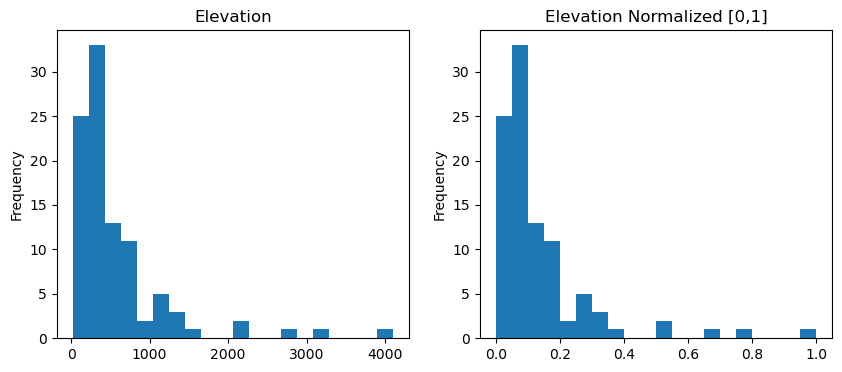

In [5]:
# Plot two histograms as subplots with Elevation and Elevation normalized
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Elevation'].plot.hist(ax=axes[0], bins=20)
df['Elevation_norm'].plot.hist(ax=axes[1], bins=20)
axes[0].set_title('Elevation')
axes[1].set_title('Elevation Normalized [0,1]')
plt.show()


In [6]:
# Explore scaler data and reverse transform
print('Min value: ', scaler.data_min_)
print('Max value: ', scaler.data_max_)

print('Middle of scaling range: ', scaler.data_min_ + (scaler.data_max_ - scaler.data_min_) / 2)
print('Inverse transform of 0.5 = ', scaler.inverse_transform([[0.5]]))

Min value:  [24.]
Max value:  [4105.]
Middle of scaling range:  [2064.5]
Inverse transform of 0.5 =  [[2064.5]]


**3. Standardization (or Z-score Normalization)**

This scales features to have a mean of 0 and a standard deviation of 1.

In [7]:
# Apply Standardization
scaler = StandardScaler()
df['Elevation_stand'] = scaler.fit_transform(df[['Elevation']])

df['Elevation_stand'].describe()

count    9.800000e+01
mean    -1.223511e-16
std      1.005141e+00
min     -8.519948e-01
25%     -5.445419e-01
50%     -3.021786e-01
75%      1.239673e-01
max      5.398145e+00
Name: Elevation_stand, dtype: float64

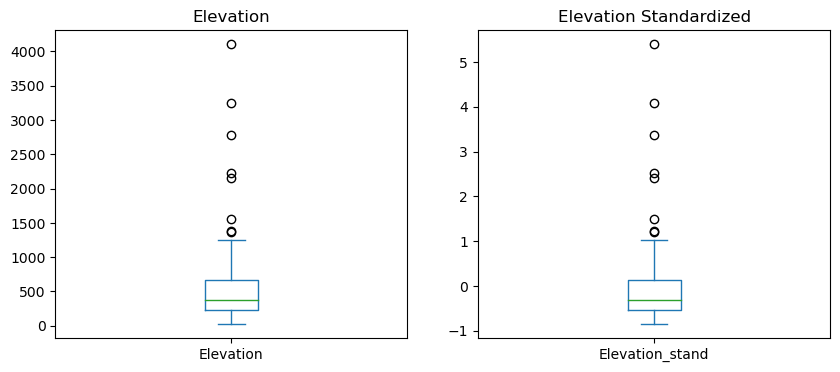

In [8]:
# Plot two boxplots as subplots with Elevation and Elevation standardized
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Elevation'].plot.box(ax=axes[0])
df['Elevation_stand'].plot.box(ax=axes[1])
axes[0].set_title('Elevation')
axes[1].set_title('Elevation Standardized')
plt.show()

**4. Distribution change**
Skewness is a measure of the asymmetry of the probability distribution. In other words, skewness can indicate whether the data points in a statistical series are skewed to one side of the average value.

Some algorithms work best if the data is normally distributed (i.e., skewness = 0). We can change the original distribution, by applying one of the following transformations:
- Logarithm: only for x>0
- Square root: only for x>=0
- Cubic root: also for x<0

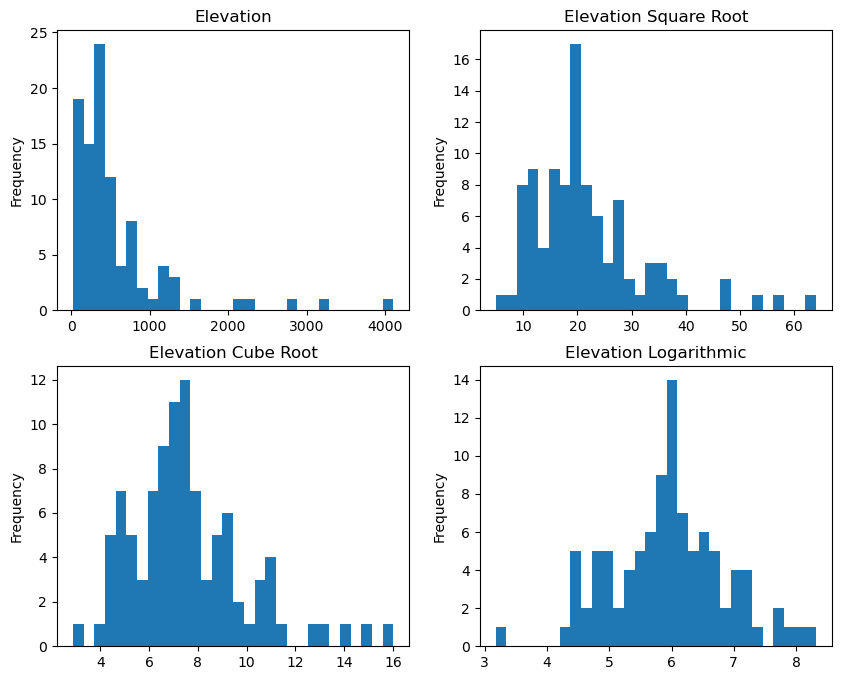

In [9]:
# Square root transformation
df['Elevation_sqrt'] = np.sqrt(df['Elevation'])

# Cube root transformation
df['Elevation_cbrt'] = np.cbrt(df['Elevation'])

# Logarithmic transformation
df['Elevation_log'] = np.log(df['Elevation'])

# Plot four histograms as subplots with original Elevation distribution and transformed versions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df['Elevation'].plot.hist(ax=axes[0, 0], bins=30)
df['Elevation_sqrt'].plot.hist(ax=axes[0, 1], bins=30)
df['Elevation_cbrt'].plot.hist(ax=axes[1, 0], bins=30)
df['Elevation_log'].plot.hist(ax=axes[1, 1], bins=30)
axes[0, 0].set_title('Elevation')
axes[0, 1].set_title('Elevation Square Root')
axes[1, 0].set_title('Elevation Cube Root')
axes[1, 1].set_title('Elevation Logarithmic')
plt.show()

In [10]:
# Compute skewness of Elevation and transformed versions
print('Skewness of Elevation: ', df['Elevation'].skew())
print('Skewness of Elevation Square Root: ', df['Elevation_sqrt'].skew())
print('Skewness of Elevation Cube Root: ', df['Elevation_cbrt'].skew())
print('Skewness of Elevation Logarithmic: ', df['Elevation_log'].skew())

Skewness of Elevation:  3.0618928562331402
Skewness of Elevation Square Root:  1.5608402771998775
Skewness of Elevation Cube Root:  1.0480091927196276
Skewness of Elevation Logarithmic:  0.015863271664933863


**Exercise 1.5**

Find transformation that minimizes skewness of Discharge and visualize the result

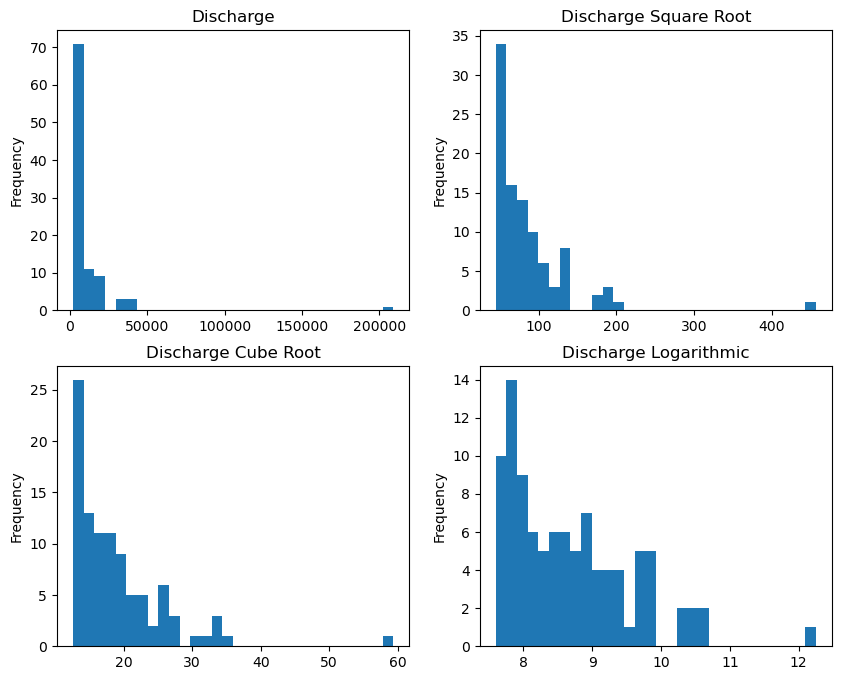

Skewness of Discharge:  7.827767035424721
Skewness of Discharge Square Root:  3.8493645730895167
Skewness of Discharge Cube Root:  2.6206218184653407
Skewness of Discharge Logarithmic:  1.1067284349687383


In [11]:
# 1.5 Solution

# Square root transformation
df['Discharge_sqrt'] = np.sqrt(df['Discharge'])

# Cube root transformation
df['Discharge_cbrt'] = np.cbrt(df['Discharge'])

# Logarithmic transformation
df['Discharge_log'] = np.log(df['Discharge'])

# Plot four histograms as subplots with original Discharge distribution and transformed versions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
df['Discharge'].plot.hist(ax=axes[0, 0], bins=30)
df['Discharge_sqrt'].plot.hist(ax=axes[0, 1], bins=30)
df['Discharge_cbrt'].plot.hist(ax=axes[1, 0], bins=30)
df['Discharge_log'].plot.hist(ax=axes[1, 1], bins=30)
axes[0, 0].set_title('Discharge')
axes[0, 1].set_title('Discharge Square Root')
axes[1, 0].set_title('Discharge Cube Root')
axes[1, 1].set_title('Discharge Logarithmic')
plt.show()

# Compute skewness of Discharge and transformed versions
print('Skewness of Discharge: ', df['Discharge'].skew())
print('Skewness of Discharge Square Root: ', df['Discharge_sqrt'].skew())
print('Skewness of Discharge Cube Root: ', df['Discharge_cbrt'].skew())
print('Skewness of Discharge Logarithmic: ', df['Discharge_log'].skew())

**5. One-Hot Encoding**

One-Hot Encoding converts categorical data into a binary matrix format

In [12]:
# Print beginning of Name and Continent columns
df[['Name', 'Continent']].head()

,Name,Continent
0,Amazon,South America
1,Congo,Africa
2,Ganges-Brahmaputra,Asia
3,Orinoco,South America
4,Guainia,South America


In [13]:
# Apply One-Hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[['Continent']])

encoded_data

c:\Users\rpal\AppData\Local\mambaforge\envs\keras\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0.

In [14]:
# Add encoded data to dataframe with column names equal to encoder categories and river names as index
df_encoded = pd.DataFrame(encoded_data, columns=encoder.categories_[0], index=df['Name'])
df_encoded.head()

,Africa,Asia,Europe,North America,Oceania,South America
Name,,,,,,
Amazon,0.0,0.0,0.0,0.0,0.0,1.0
Congo,1.0,0.0,0.0,0.0,0.0,0.0
Ganges-Brahmaputra,0.0,1.0,0.0,0.0,0.0,0.0
Orinoco,0.0,0.0,0.0,0.0,0.0,1.0
Guainia,0.0,0.0,0.0,0.0,0.0,1.0
